# Panagiotis Karamitopoulos
# Assignment 2 - Decision Trees and Random Forests

# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files
import io
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier


# Question 1

# 1.1 Load Dataset

In [ ]:
uploaded = files.upload()



Saving water_potability.csv to water_potability.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['water_potability.csv']))
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# 1.2 Description of Features



In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# 1.3 Plot Variables

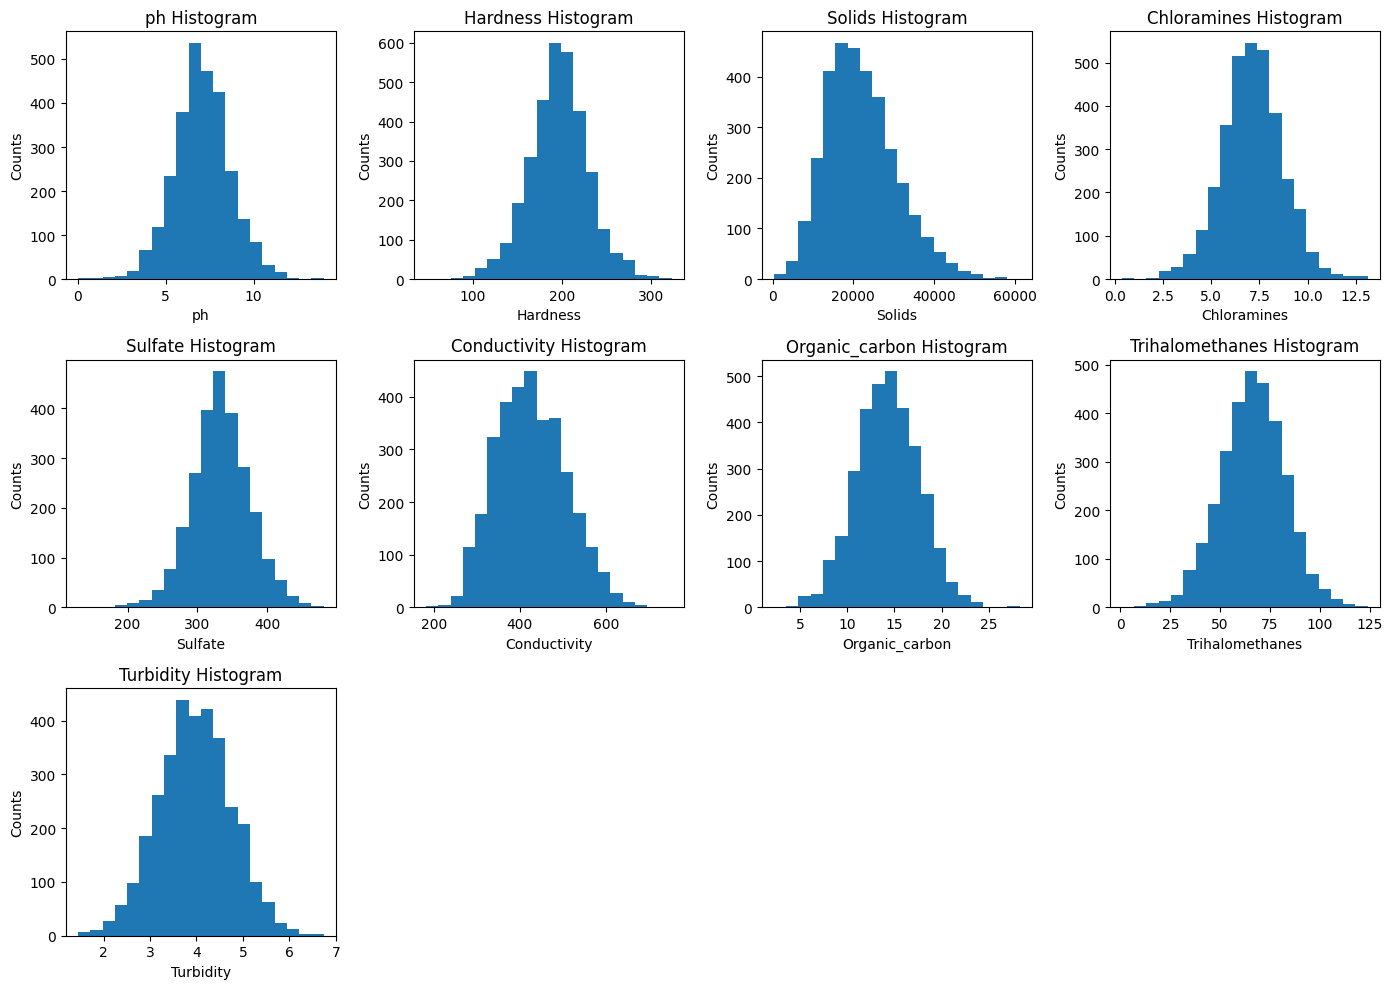

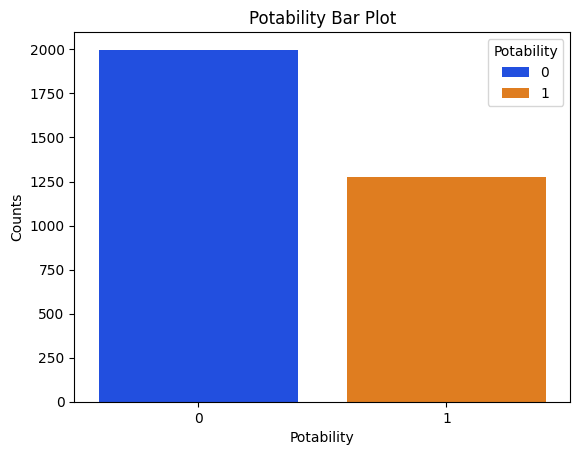

In [ ]:
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes','Turbidity']

plt.figure(figsize=(14, 10))
for i in range(len(features)):
    plt.subplot(3, 4, i + 1)
    plt.hist(df[features[i]], bins=20)
    plt.title(f'{features[i]} Histogram')
    plt.xlabel(features[i])
    plt.ylabel('Counts')
plt.tight_layout()
plt.show()

sns.countplot(x='Potability', data=df, hue='Potability', palette='bright')
plt.title('Potability Bar Plot')
plt.xlabel('Potability')
plt.ylabel('Counts')
plt.show()


# 1.3 Missing Values


In [ ]:
missing_values = df.isnull().sum()
missing_percentages = round(((missing_values / len(df)) * 100), 2)
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentages}))

                 Missing Values  Percentage (%)
ph                          491           14.99
Hardness                      0            0.00
Solids                        0            0.00
Chloramines                   0            0.00
Sulfate                     781           23.84
Conductivity                  0            0.00
Organic_carbon                0            0.00
Trihalomethanes             162            4.95
Turbidity                     0            0.00
Potability                    0            0.00


# 1.4 Potability Percentages

In [ ]:
potability_percentages = round((df['Potability'].value_counts(normalize=True) * 100), 2)
print(pd.DataFrame({'Percentage (%)': potability_percentages}))


            Percentage (%)
Potability                
0                    60.99
1                    39.01


Η ποιότητα των δεδομένων χαρακτηρίζεται μέτρια, καθώς:
1. Υπάρχουν αρκετές ελλειπές τιμές στις μεταβλητές:  ph 491 (14.99%), Sulfate 781 (23.84%) και Trihalomethanes 162 (4.95%). Για τη δημιουργία ενός πιο αξιόπιστου μοντέλου αυτές οι τιμές θα πρέπει να συμπληρωθούν.
2. Δεν υπάρχουν προφανή outliers στις περισσότερες μεταβλητές.
3. Κάποιες μεταβλητές έχουν μεγάλες διακυμάνσεις.
4. Η κλάση Potability είναι αρκετά ισορροπήμενή (61, 39). Ωστόσο, θα μπορούσε να είναι και καλύτερα γιατί μπορεί να οδηγήσει σε ένα μοντέλο που ευνοεί την κυρίαρχη κλάση (0 - μη πόσιμο νερό).


#1.5 Replace missing values

In [ ]:
imputer = SimpleImputer(strategy='mean')
df_new = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Recheck missing values
missing_values = df_new.isnull().sum()
missing_percentages = round(((missing_values / len(df_new)) * 100), 2)
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentages}))

                 Missing Values  Percentage (%)
ph                            0             0.0
Hardness                      0             0.0
Solids                        0             0.0
Chloramines                   0             0.0
Sulfate                       0             0.0
Conductivity                  0             0.0
Organic_carbon                0             0.0
Trihalomethanes               0             0.0
Turbidity                     0             0.0
Potability                    0             0.0


# Question 2

# 2.1 ph < 6.5

In [ ]:
mask_6_5 = df[df['ph'] < 6.5]
potability_6_5 = round((mask_6_5['Potability'].value_counts(normalize=True) * 100), 2)
print(f'ph < 6.5: {potability_6_5}')


ph < 6.5: Potability
0    63.22
1    36.78
Name: proportion, dtype: float64


Το νερό για ph < 6.5 δεν είναι πόσιμο για το μεγαλύτερο μέρος του συνόλου δεδομένων (63.22%), κάτι το οποίο επαληθεύεται από τον ΠΟΥ αλλά και τη χημεία,
καθώς το νερό με ph < 6.5 είναι όξινο και δεν είναι κατάλληλο προς πόση.  

# 2.2 6.5 <= ph <= 8.5

In [ ]:
mask_6_5_8_5 = df[(df['ph'] >= 6.5) & (df['ph'] <= 8.5)]
potability_6_5_8_5 = round((mask_6_5_8_5['Potability'].value_counts(normalize=True) * 100), 2)
print(f'6.5 <= ph <= 8.5: {potability_6_5_8_5}')


6.5 <= ph <= 8.5: Potability
0    56.1
1    43.9
Name: proportion, dtype: float64


Το νερό για 6.5 <= ph <= 8.5 εξακολουθεί να μην είναι πόσιμο για το μεγαλύτερο μέρος του συνόλου δεδομένων (56.1%), κάτι το οποίο σημαίνει ότι η καταλληλότητα του νέρου καθορίζεται και από άλλους παράγοντες πέρα από το ph.

# 2.3 ph > 8.5

In [ ]:
mask_8_5 = df[df['ph'] > 8.5]
potability_8_5 = round((mask_8_5['Potability'].value_counts(normalize=True) * 100), 2)
print(f'ph > 8.5: {potability_8_5}')

ph > 8.5: Potability
0    66.87
1    33.13
Name: proportion, dtype: float64


Το νερό για ph > 8.5 δεν είναι πόσιμο για το μεγαλύτερο μέρος του συνόλου δεδομένων (66.87%), κάτι το οποίο επαληθεύεται από τον ΠΟΥ αλλά και τη χημεία,
καθώς το νερό με ph > 8.5 είναι αλκαλικό και δεν είναι κατάλληλο προς πόση.

#2.4 Mean and STD of Potable and Non-potable Samples

In [ ]:
non_potable_samples = df[df['Potability'] == 0]
potable_samples = df[df['Potability'] == 1]
mean_ph_potable = round((potable_samples['ph'].mean()),2)
mean_ph_non_potable = round((non_potable_samples['ph'].mean()),2)
std_ph_potable = round((potable_samples['ph'].std()),2)
std_ph_non_potable = round((non_potable_samples['ph'].std()),2)
print(f'Potable samples: Mean ph = {mean_ph_potable}, Std ph = {std_ph_potable}')
print(f'Non-potable samples: Mean ph = {mean_ph_non_potable}, Std ph = {std_ph_non_potable}')


Potable samples: Mean ph = 7.07, Std ph = 1.45
Non-potable samples: Mean ph = 7.09, Std ph = 1.68


Φαίνεται ότι και στις δύο κατηγορίες του νερού το ph είναι γύρω στο 7 και η τυπική απόκλιση κοντά στο 1.5. Συνεπώς, το ph μόνο δεν αρκεί για την εκτίμηση της καταλληλότητας του νερού.

# Question 3

#Scatter Plot between ph and Chloramine

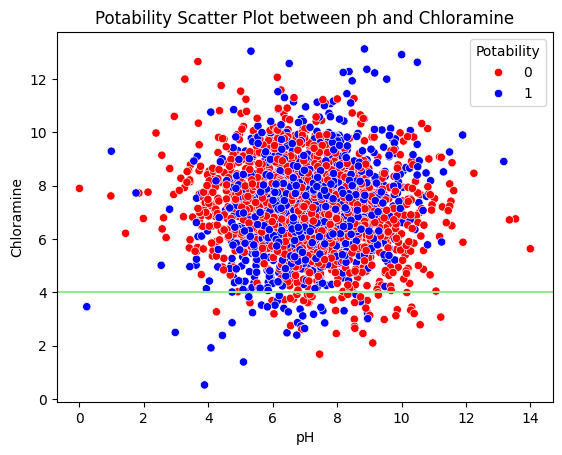

In [ ]:
sns.scatterplot(x='ph', y='Chloramines', data=df, hue='Potability', palette={0: 'red', 1: 'blue'})
plt.axhline(y=4, color='lightgreen')
plt.title('Potability Scatter Plot between ph and Chloramine')
plt.xlabel('pH')
plt.ylabel('Chloramine')
plt.show()



Από το παραπάνω διάγραμμα διασποράς προκύπτουν τα εξής συμπεράσματα:
1. Όσο τα μπλέ (πόσιμα) τόσο και τα κόκκινα (μη πόσιμα) δείγματα καλύπτουν ένα μεγάλο τμήμα του διαγράμματος, και μάλιστα στις περισσότερες περιπτώσεις επικαλύπτονται το ένα με το άλλο. Συνεπώς, δεν υπάρχει κάποιο σαφές όριο διαχωρισμού μεταξύ τους με βάση το ph και τη chloramine.
2. Αν και σύμφωνα με τον ΠΟΥ η chloramine θα έπρεπε να είναι έως 4 ppm (και το ph στο εύρος 6.5-8.5), παρατηρείται ότι υπάρχουν πολλά πόσιμα δείγματα για chloramine μεγαλύτερη του 4 ppm, καθώς και για ph εκτός του εύρους 6.5-8.5.
Ως συμπέρασμα προκύπτει ότι ούτε το ph ούτε η chloramine από μόνα τους μπορούν να διαχωρίσουν το dataset σε πόσιμα και μη πόσιμα δείγματα, σύμφωνα με τον ΠΟΥ.

# Question 4

# 4.1 Convert DataFrame to Numpy arrays


In [ ]:
input_df = df.drop(columns=['Potability'])
targets_df = df['Potability']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((3276, 9), (3276,))

# 4.2 Split Dataset to Train-Test


In [ ]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

# Question 5

# 5.1 Create a Decision Tree Model


In [ ]:
model = DecisionTreeClassifier(random_state=seed)

# 5.2 Train Model on Training Set


In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

# 5.3.1 Evaluate Model on Test Set

In [ ]:
y_pred_test = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_test)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')


The accuracy of the model is: 56.77


# 5.3.2 Evaluate Model on Train Set

In [ ]:
y_pred_train = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 99.87


Η ακρίβεια του test set είναι 56.77%, ενώ του train set 99.87%. Οι τιμές αυτές είναι αρκετά μακριά, κάτι το οποίο σημαίνει ότι υπάρχει υπερπροσαρμογή (overfitting) και το μοντέλο δεν γενικεύει καλά.

#Question 6

In [ ]:
criterions = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features_options = [None, 'sqrt']
ccp_alphas = [0, 0.01]
results = []

for criterion in criterions:
  for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
      for min_samples_leaf in min_samples_leafs:
        for max_features_option in max_features_options:
          for ccp_alpha in ccp_alphas:
            model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features_option, ccp_alpha=ccp_alpha, random_state=seed)
            model.fit(x_train, y_train)

            y_pred_test = model.predict(x_test)
            accuracy_test = accuracy_score(y_test, y_pred_test)
            accuracy_test_percentage = round(accuracy_test*100, 4)

            y_pred_train = model.predict(x_train)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            accuracy_train_percentage = round(accuracy_train*100, 4)

            results.append({'criterion': criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_features': max_features_option, 'ccp_alpha': ccp_alpha, 'train_acc': accuracy_train_percentage, 'test_acc': accuracy_test_percentage})




In [ ]:
results_df = pd.DataFrame(results)
print(results_df)


   criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
0       gini        NaN                  2                 1         None   
1       gini        NaN                  2                 1         None   
2       gini        NaN                  2                 1         sqrt   
3       gini        NaN                  2                 1         sqrt   
4       gini        NaN                  2                 2         None   
..       ...        ...                ...               ...          ...   
91   entropy        5.0                  5                 1         sqrt   
92   entropy        5.0                  5                 2         None   
93   entropy        5.0                  5                 2         None   
94   entropy        5.0                  5                 2         sqrt   
95   entropy        5.0                  5                 2         sqrt   

    ccp_alpha  train_acc  test_acc  
0        0.00    99.8692   56.7650  
1

# Question 7

# 7.1 Find Best Parameters




In [ ]:
best_parameters = results_df[results_df['max_depth'] == 3].sort_values(by='test_acc', ascending=False).iloc[0]
print(best_parameters)

criterion            entropy
max_depth                3.0
min_samples_split          5
min_samples_leaf           1
max_features            None
ccp_alpha                0.0
train_acc             64.239
test_acc             63.7843
Name: 72, dtype: object


# 7.2 Create the Best Tree


In [ ]:
best_model = DecisionTreeClassifier(criterion=best_parameters['criterion'], max_depth=int(best_parameters['max_depth']), min_samples_split=best_parameters['min_samples_split'],
    min_samples_leaf=best_parameters['min_samples_leaf'], max_features=best_parameters['max_features'], ccp_alpha=best_parameters['ccp_alpha'], random_state=seed)


# 7.3 Train the Model on Training Set


In [ ]:
best_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       max_depth=3, min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(5), random_state=0)

# Plot the Best Tree Model

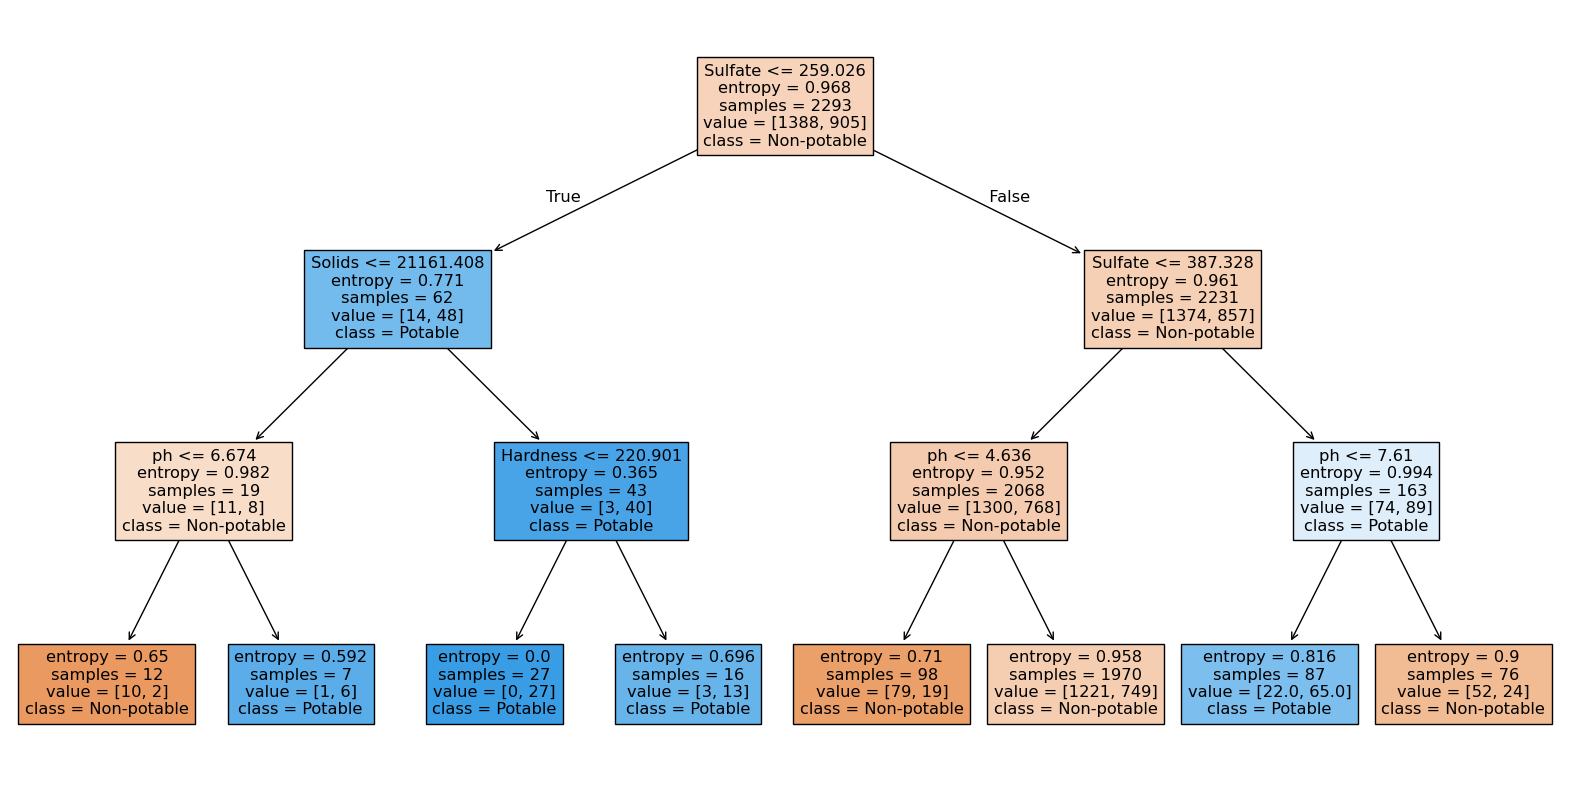

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=df.columns[:-1], class_names=['Non-potable', 'Potable'], filled=True,)
Δplt.show()

Από το παραπάνω δέντρο με max-depth = 3 προκύπτει ότι το δέντρο χρησιμοποιεί 4 χαρακτηριστικά, τα οποία είναι τα εξής: Sulfate, Solids, Hardness και ph. Επομένως η καταλληλότητα του νερού εξαρτάται από ένα συνδιασμό χαρακτηριστικών, γεγονός που αυξάνει την αξιοπιστία του μοντέλου.

Οι κανόνες if-then είναι οι εξής:
1. If (Sulfate <= 259.026) AND (Solids <= 21161.408) AND (ph <= 6.674) THEN Non-potable.
2. If (Sulfate <= 259.026) AND (Solids <= 21161.408) AND (ph > 6.674) THEN Potable.
3. If (Sulfate <= 259.026) AND (Solids > 21161.408) AND (Hardness <= 220.901) THEN Potable.
4. If (Sulfate <= 259.026) AND (Solids > 21161.408) AND (Hardness > 220.901) THEN Potable.
5. If (Sulfate > 259.026) AND (Sulfate <= 387.328) AND (ph <= 4.636) THEN Non-potable.
6. If (Sulfate > 259.026) AND (Sulfate <= 387.328) AND (ph > 4.636) THEN Non-potable.
7. If (Sulfate > 259.026) AND (Sulfate > 387.328) AND (ph <= 7.61) THEN Potable.
Ο κανόνας αυτός ισοδυναμεί με: If (Sulfate > 387.328) AND (ph <= 7.61) THEN Potable.
8. If (Sulfate > 259.026) AND (Sulfate > 387.328) AND (ph > 7.61) THEN Non-potable.
Ο κανόνας αυτός ισοδυναμεί με: If (Sulfate > 387.328) AND (ph > 7.61) THEN Non-potable.

# Question 8

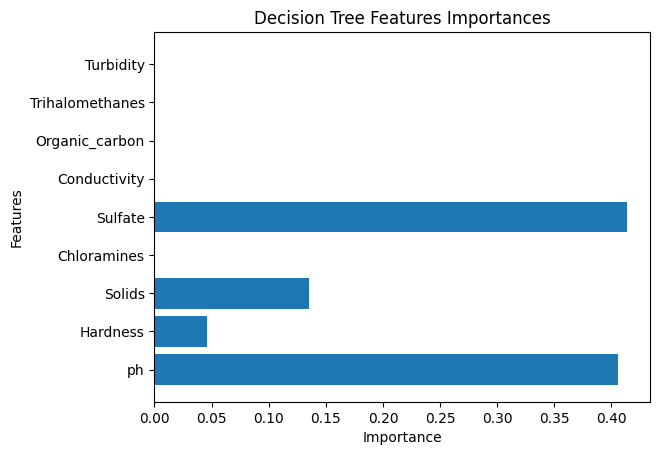

In [ ]:
importance_weights = best_model.feature_importances_
plt.barh(input_df.columns, importance_weights)
plt.title('Decision Tree Features Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Από το παραπάνω ραβδόγραμμα προκύπτει ότι τα 4 σημαντικότερα χαρακτηριστικά είναι τα εξής: Sulfate, ph, Solids και Hardness. Το Sulfate και το ph έχουν μεγαλύτερη επίδραση στην εύρεση της καταλληλότητας του νερού, ενώ το Solids και το Hardness μικρότερη. Τα υπόλοιπα χαρακτηριστικά (Turbidity, Trihalomethanes, Organic_carbon, Conductivity και Chloramines) έχουν μηδενική σημαντικότητα. Συνεπώς, η συσκευή θα χρειαστεί να κάνει μόνο αυτές τις 4 χημικές αναλύσεις.



#Question 9

Ένα Τυχαίο Δάσος (Random Forest) ενδεχομένως να πετύχαινε καλύτερη ακρίβεια από το Δέντρο Απόφασης καθώς:
1. Μειώνει την υπερπροσαρμογή (overfitting) που μπορεί να έχει ένα μόνο δέντρο.
2. Είναι πιο ανθεκτικό στο θόρυβο γιατί χρησιμοποιεί τυχαία υποσύνολα χαρακτηριστικών για κάθε δέντρο.
3. Γενικεύει καλύτερα, καθώς συνδιάζει πολλαπλές προβλέψεις.



#Question 10

In [ ]:
criterions = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features_options = [None, 'sqrt']
ccp_alphas = [0, 0.01]
n_estimators_list = [50, 100, 200]
results = []

for criterion in criterions:
  for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
      for min_samples_leaf in min_samples_leafs:
        for max_features_option in max_features_options:
          for ccp_alpha in ccp_alphas:
            for n_estimators in n_estimators_list:
              model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features_option, ccp_alpha=ccp_alpha, random_state=seed)
              model.fit(x_train, y_train)

              y_pred_test = model.predict(x_test)
              accuracy_test = accuracy_score(y_test, y_pred_test)
              accuracy_test_percentage = round(accuracy_test*100, 4)

              y_pred_train = model.predict(x_train)
              accuracy_train = accuracy_score(y_train, y_pred_train)
              accuracy_train_percentage = round(accuracy_train*100, 4)

              results.append({'n_estimators': n_estimators, 'criterion': criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_features': max_features_option, 'ccp_alpha': ccp_alpha, 'train_acc': accuracy_train_percentage, 'test_acc': accuracy_test_percentage})



In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

     n_estimators criterion  max_depth  min_samples_split  min_samples_leaf  \
0              50      gini        NaN                  2                 1   
1             100      gini        NaN                  2                 1   
2             200      gini        NaN                  2                 1   
3              50      gini        NaN                  2                 1   
4             100      gini        NaN                  2                 1   
..            ...       ...        ...                ...               ...   
283           100   entropy        5.0                  5                 2   
284           200   entropy        5.0                  5                 2   
285            50   entropy        5.0                  5                 2   
286           100   entropy        5.0                  5                 2   
287           200   entropy        5.0                  5                 2   

    max_features  ccp_alpha  train_acc  test_acc  


#Question 11

Χειρότερο για τον ταξινομητή είναι να προβλέπει ότι το νερό είναι πόσιμο (False Positive), ενώ δεν είναι. Σε αυτήν την περίπτωση το νερό θα καταναλωθεί ενώ μπορεί δεν θα είναι πόσιμο! Επομένως, κάτι τέτοιο μπορεί να βλάψει την υγεία των ανθρώπων. Από την άλλη πλευρά, αν ο ταξινομητής προβλέψει ότι κάποιος το νερό είναι μη πόσιμο (False Negative), ενώ είναι πόσιμο, τότε αυτό απλά δε θα καταναλωθεί.

Συνεπώς, είναι πολύ σημαντικότερο το μοντέλο να προβλέπει σωστά το μη-πόσιμο νερό, ακόμα κι αν χάνει λίγη ακρίβεια στο πόσιμο. Πιο συγκεκριμένα, το recall πρέπει να είναι υψηλό για το μη πόσιμο νερό ώστε να ανιχνεύονται όλα τα μολυσμένα δείγματα.




#Question 12

Το δέντρο απόφασης είναι ερμηνεύσιμο καθώς μπορεί να βρεθεί η διαδρομή που ακολουθήθηκε για να πάρει μια απόφαση.
Από την άλλη πλευρά, το τυχαίο δάσος, μπορεί να παρέχει πιο ακριβέστερα και αξιόπιστα αποτελέσματα αλλά είναι δύσκολο να ερμηνεθεί καθώς λειτουργεί σαν μαύρο κουτί. Συνεπώς, είναι αδύνατο να εξηγηθεί γιατί πάρθηκε μια απόφαση.

Ως αποτέλεσμα, νομικά ασφαλέστερο για την εταιρία είναι το καλύτερο δέντρο απόφασηςκ καθώς παρέχει διαφάνεια σε περίπτωση ελέγχου.
